**ML Project Title : MALWARE DETECTION**

**CONTENTS**

1.   Exploratory Data Analysis List item
2.   Algorithms Used:
    *   Decision Tree
    *   Support Vector Machine
          *   Linear Kernel
          *   Polynomial Kernel
          *   Radial Bias Function Kernel
    *   Logistic Regression
    *   K - Nearest Neighbor
    *   Sequential Neural Network
1.   Visualising all the accuracies in the bar-graph





In [ ]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0


In [ ]:
pip install seaborn

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-io


**EXPLORATORY DATA ANALYSIS:**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [68]:
data = pd.read_csv(r"/content/drive/MyDrive/ML Projects/drebin-215-dataset-5560malware-9476-benign.csv")

/tmp/ipython-input-347044785.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"/content/drive/MyDrive/ML Projects/drebin-215-dataset-5560malware-9476-benign.csv")


In [69]:
print("Total number of missing values : ",sum(list(data.isna().sum())))
data

Total number of missing values :  0


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [70]:
print("Total number of Features : ",len(data.columns)-1)

Total number of Features :  215


In [71]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to nan and use dropna() to remove them
data=data.replace('[?,S]',np.nan,regex=True)
print("Total number of missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0 1] ['B' 'S']
Total number of missing values :  5


/tmp/ipython-input-3836414029.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(classes,lbl_enc.fit_transform(classes))


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


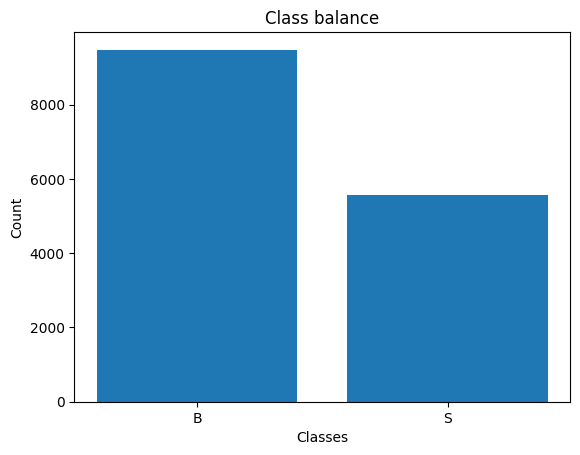

In [72]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [73]:
from sklearn.utils import resample

In [74]:
# Separate features and labels
x = data.drop("class", axis=1)
y = data["class"]

In [75]:
# Count the occurrences of each class
class_counts = y.value_counts()
class_counts

,count
class,
0,9476
1,5555


In [76]:
# Calculate the majority and minority class labels
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
print("Majority_class:",majority_class)
print("Minority_class:",minority_class)

Majority_class: 0
Minority_class: 1


In [77]:
# Separate majority and minority class samples
majority_samples = data[data["class"] == majority_class]
minority_samples = data[data["class"] == minority_class]
print("majority_samples",len(majority_samples))
print("minority_samples",len(minority_samples))

majority_samples 9476
minority_samples 5555


In [78]:
# Oversample the minority class to match the majority class
minority_oversampled = resample(minority_samples,
                                 replace=True,      # Sample with replacement
                                 n_samples=len(majority_samples),  # Match majority class
                                 random_state=0)    # Set random seed for reproducibility
print("majority_samples",len(majority_samples))
print("minority_oversampled",len(minority_oversampled))

majority_samples 9476
minority_oversampled 9476


In [79]:
# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_samples, minority_oversampled])
print("balanced_data",len(balanced_data))

balanced_data 18952


In [80]:
# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=0)

# Now, balanced_data contains the balanced dataset with equal instances of both classes
balanced_data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10986,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4632,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
233,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1392,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1413,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
5104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,1
1444,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [81]:
# Count the occurrences of each class in the balanced dataset
balanced_class_counts = balanced_data["class"].value_counts()

# Print the class counts
print(balanced_class_counts)

class
1    9476
0    9476
Name: count, dtype: int64


In [82]:
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.3,
                                                  shuffle=True)

In [83]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  10521
Train labels size :  10521
Test features size :  4510
Test features size :  4510


In [84]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (10521, 215)
Train labels :  (10521,)
Test Features :  (4510, 215)
Test labels :  (4510,)


In [85]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))

In [86]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (10521, 215)
Train labels :  (10521, 1)
Test Features :  (4510, 215)
Test labels :  (4510, 1)



**HEATMAP**

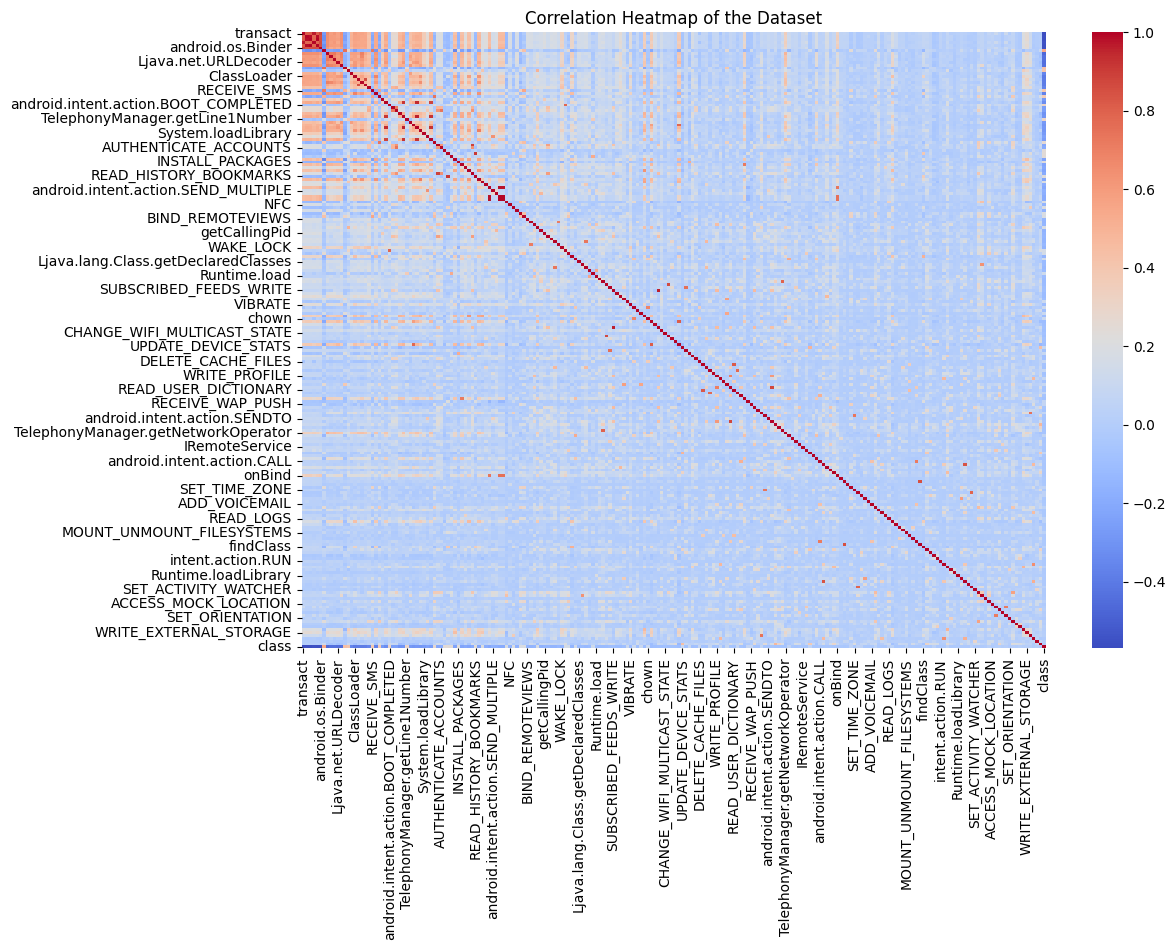

In [87]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()


**DECISION TREE**

In [88]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [89]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98



**SUPPORT VECTOR MACHINE**

Using three different kinds of Kernel in the SVM:

*   Linear Kernel
*   Polynomial Kernel
*   Radial Bias Function Kernel (RBF)


In [92]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
kernel_list = ['linear', 'poly', 'rbf']

for kernel in kernel_list:
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.2f}")

Accuracy with linear kernel: 0.98
Accuracy with poly kernel: 0.96
Accuracy with rbf kernel: 0.98



**LOGISTIC REGRESSION**

In [34]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [37]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98



**K - Nearest Neighbour**

In [39]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
k = 5  # You can set the number of neighbors (k) as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98



**VISUALISING ALL ACCURACIES IN TERMS OF THE GRAPH**

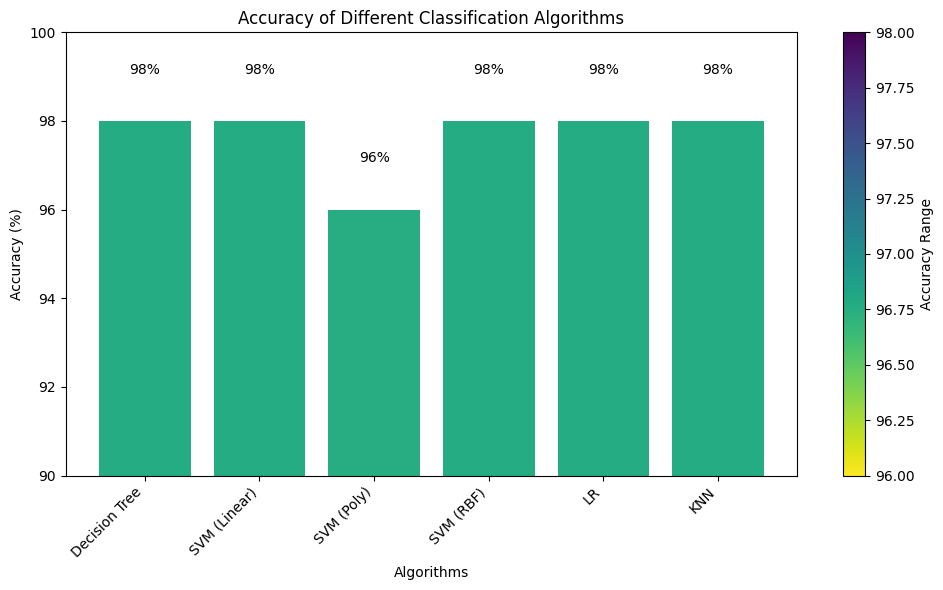

In [61]:
import matplotlib.pyplot as plt

# Names of the algorithms
algorithms = ['Decision Tree', 'SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)', 'LR', 'KNN']

# Corresponding accuracy values
accuracies = [98, 98, 96, 98, 98, 98]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a colorful bar graph
colors = plt.cm.viridis_r(accuracies)  # Use a colormap to generate colors
bars = plt.bar(algorithms, accuracies, color=colors)

# Add data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom', fontsize=10)

# Customize plot elements
plt.title('Accuracy of Different Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)  # Set the y-axis limits

# Show the colorful legend indicating the accuracy range
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis_r, norm=plt.Normalize(vmin=min(accuracies), vmax=max(accuracies)))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Accuracy Range')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install streamlit